# <span style="color:blue"> SLACK - BOT</span>

In [1]:
# Importamos librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from textblob import TextBlob
from datetime import datetime
import time
from statsmodels.tsa.seasonal import seasonal_decompose # librería que contiene funciones y modelos estadísticos para el análisis de datos

In [2]:
df = pd.read_csv('files/slack_historial_de_mensajes_filtrados.csv')

In [3]:
df.columns

Index(['Unnamed: 0', 'index', 'Unnamed: 0.1', 'client_msg_id', 'type', 'text',
       'ts', 'team', 'blocks', 'bot_id', 'bot_profile', 'files', 'upload',
       'display_as_bot', 'thread_ts', 'reply_count', 'reply_users_count',
       'latest_reply', 'reply_users', 'subscribed', 'reactions', 'subtype',
       'inviter', 'edited', 'attachments', 'Channel_id', 'Channel_name',
       'bot_link', 'purpose', 'user_hash', 'datetime', 'date', 'time', 'h',
       'm', 's', 'translations'],
      dtype='object')

In [4]:
df.shape

(378, 37)

In [5]:
df.reset_index(inplace=True)

In [6]:
important_cols = ['Channel_id', 'text', 'translations']
df[important_cols]

,Channel_id,text,translations
0,C01C9U9CJ3S,"Gracias. Ya les escribí, espero se una alguien.","Thank you. I already wrote, I hope someone wil..."
1,C01C9U9CJ3S,Cuidese no mas,Take care no more
2,C01C9U9CJ3S,hola buenos días ! ok :wink:,Hello good day ! ok: wink:
3,C01C9U9CJ3S,No pasa nada!,Nothing happens!
4,C01C9U9CJ3S,Dale Ivan! Buen día!,Go Ivan! Good day!
...,...,...,...
373,C01BDAZ7YVC,:wave: Hello!,: wave: Hello!
374,C01BDAZ7YVC,Jeñou,Jeñou
375,C01BDAZ7YVC,:wave: ¡Hola a todo el mundo!,: wave: Hello everyone!
376,C01BDAZ7YVC,:wave: Hi everyone!,: wave: Hi everyone!


### 1) Análisis de polaridad y subjetividad

In [7]:
# Creo dos nuevas variables en el dataset para almacenar la información de los índices de polaridad y subjetividad
df['polarity'] = df['translations'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['subjectivity'] = df['translations'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [8]:
important_cols = ['Channel_id', 'text', 'translations', 'polarity', 'subjectivity']
df[important_cols]

,Channel_id,text,translations,polarity,subjectivity
0,C01C9U9CJ3S,"Gracias. Ya les escribí, espero se una alguien.","Thank you. I already wrote, I hope someone wil...",0.0000,0.00
1,C01C9U9CJ3S,Cuidese no mas,Take care no more,-0.2500,0.50
2,C01C9U9CJ3S,hola buenos días ! ok :wink:,Hello good day ! ok: wink:,0.6875,0.55
3,C01C9U9CJ3S,No pasa nada!,Nothing happens!,0.0000,0.00
4,C01C9U9CJ3S,Dale Ivan! Buen día!,Go Ivan! Good day!,0.8750,0.60
...,...,...,...,...,...
373,C01BDAZ7YVC,:wave: Hello!,: wave: Hello!,0.0000,0.00
374,C01BDAZ7YVC,Jeñou,Jeñou,0.0000,0.00
375,C01BDAZ7YVC,:wave: ¡Hola a todo el mundo!,: wave: Hello everyone!,0.0000,0.00
376,C01BDAZ7YVC,:wave: Hi everyone!,: wave: Hi everyone!,0.0000,0.00


In [9]:
# Lo guardamos como un archivo .csv
df.to_csv('files/slack_historial_de_mensajes_polarizados.csv', sep=',')

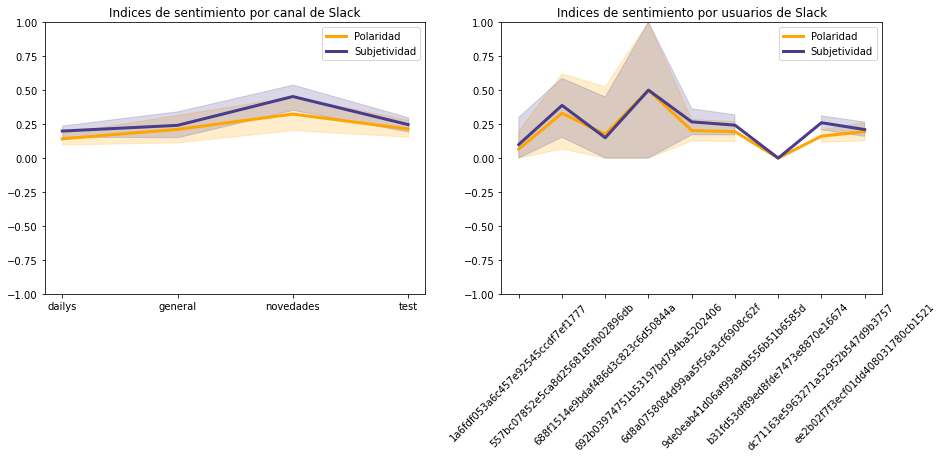

In [10]:
plt.figure (figsize=(15,5))

plt.subplot(121)
p1= sns.lineplot(data=df, x='Channel_name', y='polarity', estimator=np.mean, color='orange', label='Polaridad',linewidth=3)
sns.lineplot(data=df, x='Channel_name', y='subjectivity', estimator=np.mean, color='darkslateblue', label='Subjetividad',linewidth=3)
plt.xticks(rotation=90);
plt.xlabel('')
plt.ylabel('')
plt.ylim(-1,1)
plt.xticks(rotation=0)
plt.title('Indices de sentimiento por canal de Slack')

plt.subplot(122)
p1= sns.lineplot(data=df, x='user_hash', y='polarity', estimator=np.mean, color='orange', label='Polaridad',linewidth=3)
sns.lineplot(data=df, x='user_hash', y='subjectivity', estimator=np.mean, color='darkslateblue', label='Subjetividad',linewidth=3)
plt.xticks(rotation=90);
plt.xlabel('')
plt.ylabel('')
plt.ylim(-1,1)
plt.xticks(rotation=45)
plt.title('Indices de sentimiento por usuarios de Slack')

plt.savefig('figures/01_indices_de_sentimiento.jpg')

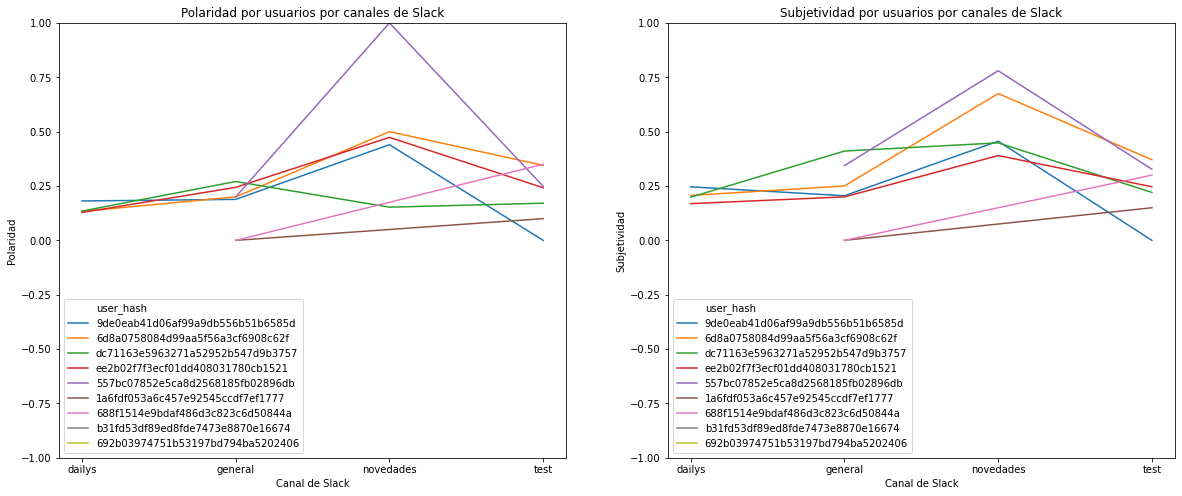

In [11]:
plt.figure (figsize=(20,8))

plt.subplot(121)
plt1= sns.lineplot(data=df, x='Channel_name', y='polarity', hue='user_hash',ci=None)
plt.xticks(rotation=0);
plt.xlabel('Canal de Slack')
plt.ylabel('Polaridad')
plt.ylim(-1,1)
plt.title('Polaridad por usuarios por canales de Slack')

plt.subplot(122)
plt1= sns.lineplot(data=df, x='Channel_name', y='subjectivity', hue='user_hash',ci=None)
plt.xticks(rotation=0);
plt.xlabel('Canal de Slack')
plt.ylabel('Subjetividad')
plt.ylim(-1,1)
plt.title('Subjetividad por usuarios por canales de Slack')

plt.savefig('figures/02_indices_de_sentimiento_por_usuarios.jpg')

### 4.2) Análisis de polaridad en español

In [12]:
from pysentimiento import SentimentAnalyzer

C:\Users\verob\miniconda3\envs\meraki2\lib\site-packages\torch\cuda\__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [41]:
for i, row in df.iterrows():
    message = row['text']
    result=analyzer.predict_probas(message)
    df.loc[i,'negativity']=result['NEG']
    df.loc[i,'neutrality']=result['NEU']
    df.loc[i,'positivity']=result['POS']
    result_2=analyzer.predict(message)
    df.loc[i,'class']=str(result_2)

In [42]:
important_cols = ['Channel_id', 'text', 'translations', 'polarity', 'subjectivity', 'negativity','neutrality','positivity', 'class']
df[important_cols][:30]

,Channel_id,text,translations,polarity,subjectivity,negativity,neutrality,positivity,class
date,,,,,,,,,
2020-11-03,C01C9U9CJ3S,"Gracias. Ya les escribí, espero se una alguien.","Thank you. I already wrote, I hope someone wil...",0.0000,0.000000,0.024276,0.962979,0.012744,NEU
2020-10-30,C01C9U9CJ3S,Cuidese no mas,Take care no more,-0.2500,0.500000,0.023002,0.817739,0.159259,NEU
2020-10-30,C01C9U9CJ3S,hola buenos días ! ok :wink:,Hello good day ! ok: wink:,0.6875,0.550000,0.023002,0.817739,0.159259,NEU
2020-10-30,C01C9U9CJ3S,No pasa nada!,Nothing happens!,0.0000,0.000000,0.023002,0.817739,0.159259,NEU
2020-10-30,C01C9U9CJ3S,Dale Ivan! Buen día!,Go Ivan! Good day!,0.8750,0.600000,0.023002,0.817739,0.159259,NEU
2020-10-30,C01C9U9CJ3S,Hola. Muy buenos días.\nNo podré estar hoy en ...,Hi. Very good days.\nI won't be able to be in ...,0.4700,0.468333,0.023002,0.817739,0.159259,NEU
2020-10-27,C01C9U9CJ3S,Jajajajaja,Hahaha,0.2000,0.400000,0.949299,0.046810,0.003892,NEG
2020-10-27,C01C9U9CJ3S,Si pueden por hoy cerrar este slack asi no les...,If you can close this slack for today so I don...,0.3250,0.325000,0.949299,0.046810,0.003892,NEG
2020-10-27,C01C9U9CJ3S,jaja puede ser... les prometo que no me queda ...,haha it could be ... I promise you I don't hav...,0.1000,0.150000,0.949299,0.046810,0.003892,NEG


In [20]:
analyzer = SentimentAnalyzer()
result= analyzer.predict("Qué gran jugador es Messi")
result

'POS'

In [25]:
result=analyzer.predict_probas("Dónde estamos?")
result

{'NEG': 0.10235339403152466,
 'NEU': 0.8503279089927673,
 'POS': 0.0473187230527401}

### 4.3) Análisis de series de tiempo

In [14]:
df.set_index('date', inplace=True)

In [15]:
df_sub= df['subjectivity']

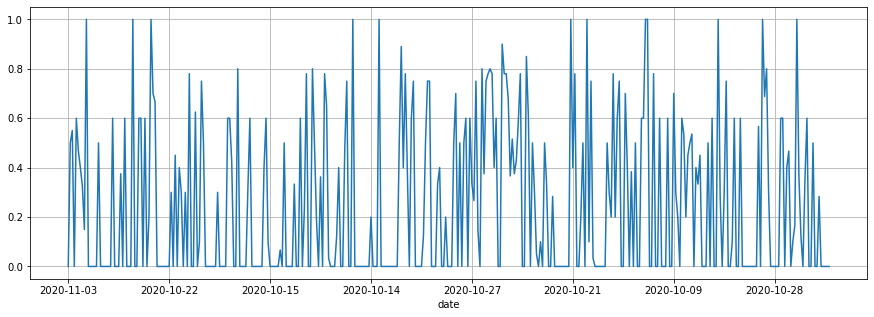

In [16]:
# Ahora que la variable 'datetime' se reconoce como una serie de tiempo, es momento de visualizar nuestros datos
df_sub.plot(grid=True, figsize=(15,5))

plt.savefig('figures/03_subjetividad_global.jpg')

In [17]:
df_pol= df['polarity']

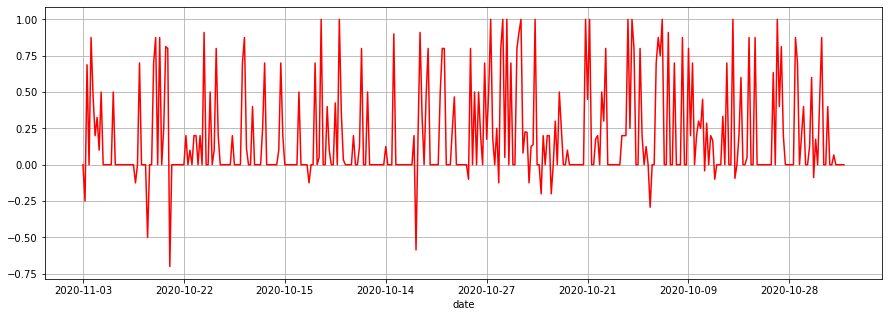

In [18]:
df_pol.plot(grid=True, figsize=(15,5), color='red')

plt.savefig('figures/04_polaridad_global.jpg')

NameError: name 'dailys' is not defined

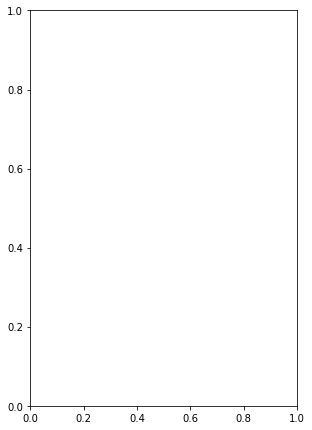

In [19]:
plt.figure (figsize=(22,16))

################################## POLARITY ###################################################
plt.subplot(241)
sns.barplot (x=dailys.date, y=dailys.polarity, ci=None,  color='green')
plt.xticks(rotation=50)
plt.title("Canal #DAILYS")
plt.ylabel('Polaridad')
plt.xlabel('')
plt.ylim(-0.2,1.1)

plt.subplot(242)
sns.barplot (x=novedades.date, y=novedades.polarity, ci=None,  color='green')
plt.xticks(rotation=50)
plt.title("Canal #NOVEDADES")
plt.ylabel('Polaridad')
plt.xlabel('')
plt.ylim(-0.2,1.1)

plt.subplot(243)
sns.barplot (x=test.date, y=test.polarity, ci=None,  color='green')
plt.xticks(rotation=50)
plt.title("Canal #TEST")
plt.ylabel('Polaridad')
plt.xlabel('')
plt.ylim(-0.2,1.1)

plt.subplot(244)
sns.barplot (x=general.date, y=general.polarity, ci=None,  color='green')
plt.xticks(rotation=50)
plt.title("Canal #GENERAL")
plt.ylabel('Polaridad')
plt.xlabel('')
plt.ylim(-0.2,1.1)


################################## SUBJECTIVITY ###################################################

plt.subplot(245)
sns.barplot (x=dailys.date, y=dailys.subjectivity, ci=None, color='orange')
plt.xticks(rotation=50)
plt.title("Canal #DAILYS")
plt.ylabel('Subjetividad')
plt.xlabel('')
plt.ylim(0,1.1)

plt.subplot(246)
sns.barplot (x=novedades.date, y=novedades.subjectivity, ci=None,  color='orange')
plt.xticks(rotation=50)
plt.title("Canal #NOVEDADES")
plt.ylabel('Subjetividad')
plt.xlabel('')
plt.ylim(0,1.1)

plt.subplot(247)
sns.barplot (x=test.date, y=test.subjectivity, ci=None, color='orange')
plt.xticks(rotation=50)
plt.title("Canal #TEST")
plt.ylabel('Subjetividad')
plt.xlabel('')
plt.ylim(0,1.1)

plt.subplot(248)
sns.barplot (x=general.date, y=general.subjectivity, ci=None,  color='orange')
plt.xticks(rotation=50)
plt.title("Canal #GENERAL")
plt.ylabel('Subjetividad')
plt.xlabel('')
plt.ylim(0,1.1)


In [ ]:
plt.figure (figsize=(15,18))

plt.subplot(221)
p1= sns.lineplot(data=dailys, x='date', y='polarity' , color='green', label='polarity', ci=None)
sns.lineplot(data=dailys, x='date', y='subjectivity', color='purple',label='subjectivity', ci=None)
plt.xticks(rotation=50)
plt.ylabel('')
plt.xlabel('')
plt.ylim(-0.5,1)
plt.title('Canal #dailys')

plt.subplot(222)
p1= sns.lineplot(data=general, x='date', y='polarity' , color='green', label='polarity', ci=None)
sns.lineplot(data=general, x='date', y='subjectivity', color='purple',label='subjectivity', ci=None)
plt.xticks(rotation=50)
plt.ylabel('')
plt.xlabel('')
plt.ylim(-0.5,1)
plt.title('Canal #general')

plt.subplot(223)
p1= sns.lineplot(data=novedades, x='date', y='polarity' , color='green', label='polarity', ci=None)
sns.lineplot(data=novedades, x='date', y='subjectivity', color='purple',label='subjectivity', ci=None)
plt.xticks(rotation=50)
plt.ylabel('')
plt.xlabel('')
plt.ylim(-0.5,1)
plt.title('Canal #novedades')

plt.subplot(224)
p1= sns.lineplot(data=test, x='date', y='polarity' , color='green', label='polarity', ci=None)
sns.lineplot(data=test, x='date', y='subjectivity', color='purple',label='subjectivity', ci=None)
plt.xticks(rotation=50)
plt.ylabel('')
plt.xlabel('')
plt.ylim(-0.5,1)
plt.title('Canal #test')

In [ ]:
plot1 = df_short['Channel_name'].value_counts().plot(kind='bar',
                                            title='Actividad por canal')

In [ ]:
plot2 = df_short['Channel_name'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='Cantidad de mensajes por canales')

In [ ]:
plot1 = df_short['user'].value_counts().plot(kind='bar',
                                            title='Actividad de los usuarios')